### Empirical Example Three for RobustiPy!

#### This example is designed to show how the OLSRobust class can be used to estimate a model with longitudinal data.

To get access to this data, you'll need the Understanding Society: Longitudinal Teaching Dataset, Waves 1-9, 2009-2018 from [[here](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8715#!/access-data)]. Registration is immediate for this. Documentation which accompanies it can be found [[here](https://doc.ukdataservice.ac.uk/doc/8715/mrdoc/pdf/8715_user_guide.pdf)].

You want to put this data somewhere like `.data/input`.

As always, lets load in some of the libraries which we'll need:

In [1]:
import os
import numpy as np
import pandas as pd
from robustipy.models import OLSRobust

Then, load in the dataset (note: we are using the tab-seperated version, but they should all be equivilent):

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(),
                              'data',
                              'input',
                              'longitudinal_td.tab'), sep='\t',
                 low_memory=False)
df['pidp'] = df['pidp'].astype(int)
#df['pidp'] = pd.to_numeric(df['pidp'], errors='raise')
df.dtypes

pidp           int64
wave           int64
hidp           int64
buno_dv        int64
intdatd_dv    object
               ...  
envhabit7     object
envhabit8     object
envhabit9     object
envhabit10    object
envhabit11    object
Length: 148, dtype: object

Let's quickly eyeball the data to see what we have:

In [3]:
df.head(5)

,pidp,wave,hidp,buno_dv,intdatd_dv,intdatm_dv,intdaty_dv,indmode,numintd_dv,hhorig,...,envhabit2,envhabit3,envhabit4,envhabit5,envhabit6,envhabit7,envhabit8,envhabit9,envhabit10,envhabit11
0,68001367,1,68001363,1,19,1,2009,1,1,1,...,2,4,4,4,3,3,3,1,5,1
1,68004087,1,68004083,1,8,1,2009,1,9,1,...,1,5,1,3,2,1,5,3,4,6
2,68004087,2,68013602,1,16,2,2010,1,9,1,...,,,,,,,,,,
3,68004087,3,68013604,1,9,2,2011,1,9,1,...,,,,,,,,,,
4,68004087,4,68013606,1,24,1,2012,1,9,1,...,1,5,1,5,3,1,6,2,5,6


Our main dependent variable of interest is sf1_dv: General health.

In [4]:
df['sf1_dv'] = pd.to_numeric(df['sf1_dv'], errors='coerce')

Then, we're going to binarise it so that good health is 3 or more (==1), zero otherwise:

In [5]:
df = df[df['sf1_dv']>0]
df['sf1_dv_good'] = np.where(df['sf1_dv']>=3, 1, 0)

Let's convert our `sex_dv` variable into binary 1s and zeros:

<Axes: >

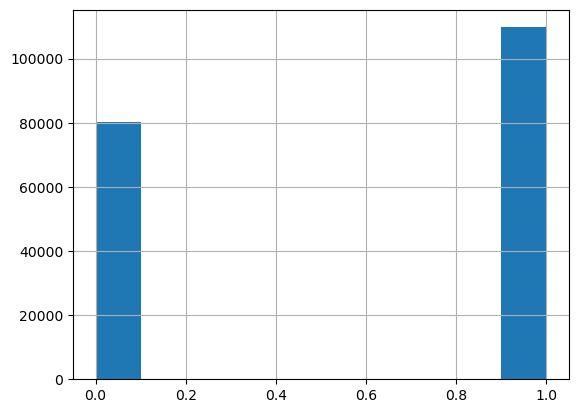

In [6]:
df['sex_dv'] = pd.to_numeric(df['sex_dv'], errors='coerce')
df['sex_dv'] = np.where(df['sex_dv']==2, 1, 0)
df['sex_dv'].hist()

Let's do something similar for cohab_dv, but this is already 1s and 0s:

In [7]:
df['cohab_dv'] = pd.to_numeric(df['cohab_dv'], errors='coerce')
df = df[df['cohab_dv']>=0]

<Axes: >

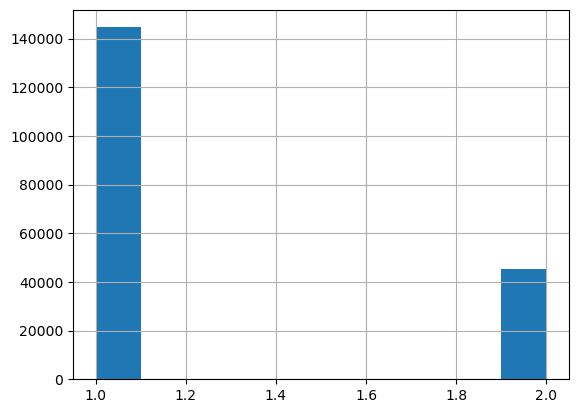

In [8]:
df['urban_dv'] = pd.to_numeric(df['urban_dv'], errors='coerce')
df = df[df['urban_dv']>0]
df['urban_dv'].hist()

Lets then – for simplicity and without failing to appreciate the complexity of this variable – dichotomize an additional variable (after cleaning it for missing/non-response). You can make something as simple as `is_british` (==1, 0 otherwise), or something more elaborate.

In [9]:
df['ethn_dv'] = pd.to_numeric(df['ethn_dv'], errors='coerce')
df = df[df['ethn_dv']>0]
df['is_british'] = np.where(df['ethn_dv']==1, 1, 0)

In [10]:
df = df[df['hhsize_dv']>0]

In [11]:
df['age_dv'] = pd.to_numeric(df['age_dv'], errors='coerce')
df = df[df['age_dv']>0]

Let's next make a variable for whether an individual has a degree or not:

In [12]:
df['hiqual_dv'] = pd.to_numeric(df['hiqual_dv'], errors='coerce')
df = df[df['hiqual_dv']>0]
df['has_degree'] = np.where(df['hiqual_dv']==3, 1, 0)

Subset our dataframe for simplicity:

In [13]:
df = df.reset_index()
df = df[['sf1_dv_good', 'age_dv', 'sex_dv', 'cohab_dv', 'pidp', 'is_british', 'urban_dv', 'hhsize_dv']]
df.head(5)

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv
0,0,39.0,0,0,68001367,1,1.0,1
1,0,59.0,0,0,68004087,0,1.0,1
2,0,60.0,0,0,68004087,0,1.0,1
3,0,61.0,0,0,68004087,0,1.0,1
4,0,62.0,0,0,68004087,0,1.0,1


What's the length?

In [14]:
len(df)

189882

Now let's drop and see if we lose any (we shouldnt, though! Why?)

In [15]:
df = df.dropna()
print(len(df))

189882


Now what does our dataset look like?

In [16]:
df.head(5)

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv
0,0,39.0,0,0,68001367,1,1.0,1
1,0,59.0,0,0,68004087,0,1.0,1
2,0,60.0,0,0,68004087,0,1.0,1
3,0,61.0,0,0,68004087,0,1.0,1
4,0,62.0,0,0,68004087,0,1.0,1


Lets quickly check the correlation matrix to check that nothing funky is going on:

In [17]:
df.corr()

,sf1_dv_good,age_dv,sex_dv,cohab_dv,pidp,is_british,urban_dv,hhsize_dv
sf1_dv_good,1.000000,0.196497,-0.003283,-0.032620,0.000090,0.003157,-0.031280,-0.104935
age_dv,0.196497,1.000000,-0.041363,-0.205496,0.004665,0.231598,0.127629,-0.468430
sex_dv,-0.003283,-0.041363,1.000000,-0.007800,-0.007921,-0.004104,0.006571,0.024375
cohab_dv,-0.032620,-0.205496,-0.007800,1.000000,-0.006169,0.063182,-0.021365,0.077739
pidp,0.000090,0.004665,-0.007921,-0.006169,1.000000,-0.025527,-0.031121,0.014132
is_british,0.003157,0.231598,-0.004104,0.063182,-0.025527,1.000000,0.182253,-0.221238
urban_dv,-0.031280,0.127629,0.006571,-0.021365,-0.031121,0.182253,1.000000,-0.052521
hhsize_dv,-0.104935,-0.468430,0.024375,0.077739,0.014132,-0.221238,-0.052521,1.000000


What data types do we have here?

In [18]:
df.dtypes

sf1_dv_good      int64
age_dv         float64
sex_dv           int64
cohab_dv         int64
pidp             int64
is_british       int64
urban_dv       float64
hhsize_dv        int64
dtype: object

Finally, lets call RobustiPy as we do in other examples, noting the group='pipd' call:

In [19]:
ukhls_robustipy = OLSRobust(y=['sf1_dv_good'],
                            x=['age_dv'],
                            data=df.dropna())

Now, let's fit the model:

In [ ]:
ukhls_robustipy.fit(controls=['cohab_dv',
                              'sex_dv',
                              'is_british',
                              'urban_dv',
                              'hhsize_dv',
                             ],
                   draws=1000,
                   kfold=10,
                   group='pidp'
                   )

Output()

And, get the results:

In [ ]:
ukhls_results = ukhls_robustipy.get_results()

Plot results:

In [ ]:
ukhls_results.plot(ic='hqic',
                   figsize=(16, 16),
                   specs=[['sex_dv', 'urban_dv']]
                   )

And print the summary statistic:

In [ ]:
ukhls_results.summary()